데이터 전처리   
[참고](https://towardsdatascience.com/image-pre-processing-c1aec0be3edf)

# 0. 데이터 준비


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import output
# !cp 파일1 파일2 # 파일1을 파일2로 복사 붙여넣기
!cp "/content/drive/MyDrive/Dacon2021_computervision/data_2.zip" "data_2.zip"
# data_2.zip을 현재 디렉터리에 압축해제
!unzip "data_2.zip"

Archive:  data_2.zip
  inflating: dirty_mnist_2nd.zip     
  inflating: dirty_mnist_2nd_answer.csv  
  inflating: mnist_data.zip          
  inflating: sample_submission.csv   
  inflating: test_dirty_mnist_2nd.zip  


In [3]:
from google.colab import output
# 현재 디렉터리에 dirty_mnist라는 폴더 생성
!mkdir "./dirty_mnist"
#dirty_mnist.zip라는 zip파일을 dirty_mnist라는 폴더에 압축 풀기
!unzip "dirty_mnist_2nd.zip" -d "./dirty_mnist/"
# 현재 디렉터리에 test_dirty_mnist라는 폴더 생성
!mkdir "./test_dirty_mnist"
#test_dirty_mnist.zip라는 zip파일을 test_dirty_mnist라는 폴더에 압축 풀기
!unzip "test_dirty_mnist_2nd.zip" -d "./test_dirty_mnist/"
# 출력 결과 지우기
output.clear()

Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import imutils
import zipfile
import os
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from google.colab import output
##cuda??###################################################################################
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # 디바이스 설정

#0. 현재 데이터 확인

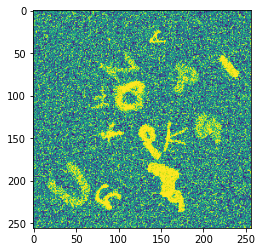

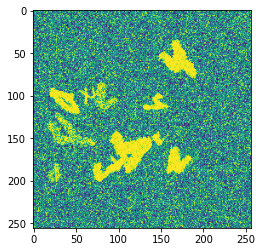

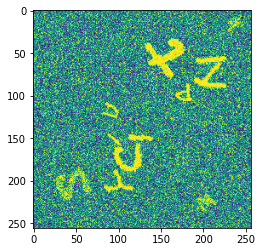

In [12]:
dirty_mnist_answer = pd.read_csv("dirty_mnist_2nd_answer.csv")
# 데이터 위치/이름 저장 
namelist = os.listdir('./dirty_mnist/')

for index in range(3):
  image = plt.imread('./dirty_mnist/' + str(dirty_mnist_answer.iloc[index,0]).zfill(5) + '.png')
  plt.imshow(image)
  plt.show()

#1. Resize (업스케일링)

Original size (256, 256)


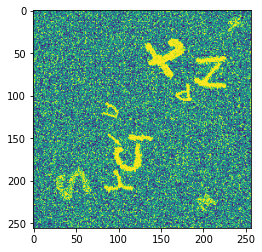

In [18]:
# 이미지 하나 받고 확인 
img = cv2.imread('./dirty_mnist/' + str(dirty_mnist_answer.iloc[index,0]).zfill(5) + '.png', cv2.IMREAD_UNCHANGED) 
print('Original size',img.shape)
plt.imshow(img)
plt.show()

In [19]:
# Resize setting
height = 500
width = 500
dim = (width, height)
#res_img = []

RESIZED (500, 500)


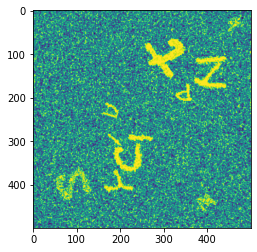

In [21]:
res = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
#res_img.append(res)

# Checcking the size
print("RESIZED", res.shape)
    
# Visualizing one of the images in the array
plt.imshow(res)
plt.show()

#2. Noise Reduction

15-25 정도가 적당한듯?

Blured , Kernel size :  1


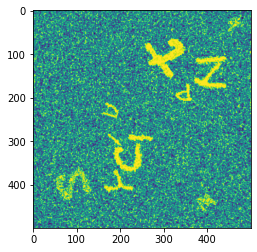

Blured , Kernel size :  3


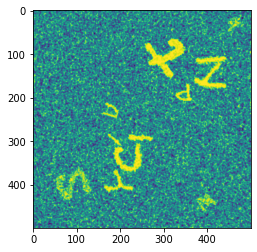

Blured , Kernel size :  5


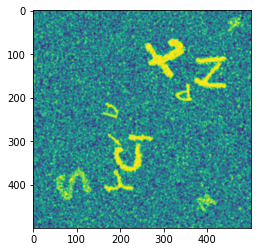

Blured , Kernel size :  7


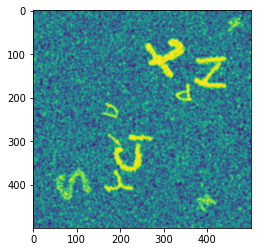

Blured , Kernel size :  9


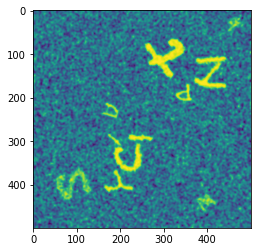

Blured , Kernel size :  11


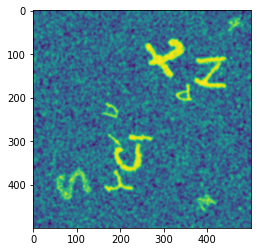

Blured , Kernel size :  13


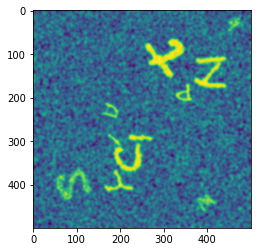

Blured , Kernel size :  15


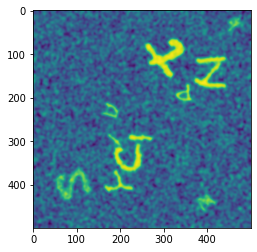

Blured , Kernel size :  17


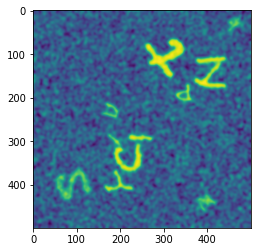

Blured , Kernel size :  19


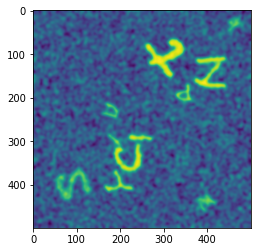

Blured , Kernel size :  21


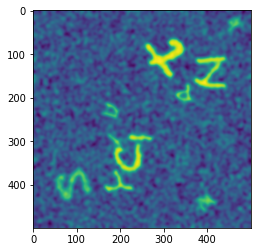

Blured , Kernel size :  23


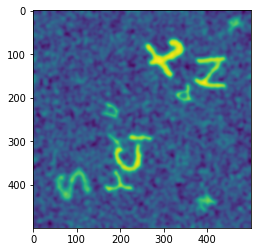

Blured , Kernel size :  25


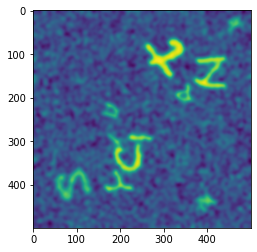

Blured , Kernel size :  27


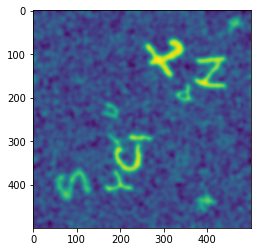

Blured , Kernel size :  29


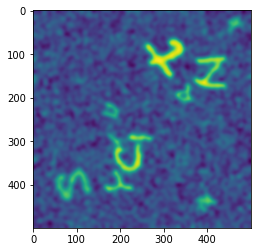

Blured , Kernel size :  31


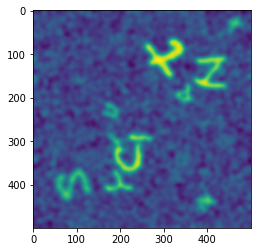

Blured , Kernel size :  33


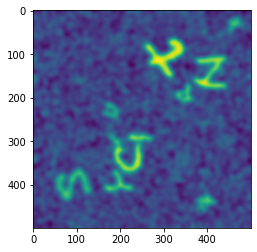

Blured , Kernel size :  35


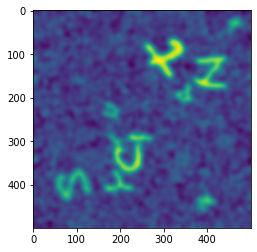

Blured , Kernel size :  37


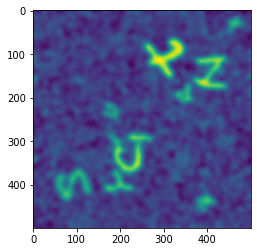

Blured , Kernel size :  39


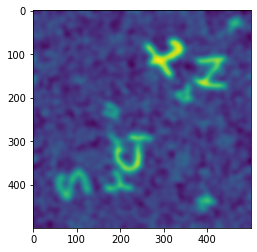

Blured , Kernel size :  41


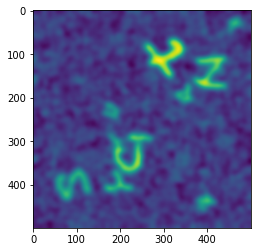

Blured , Kernel size :  43


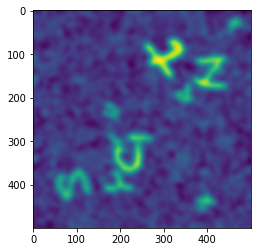

Blured , Kernel size :  45


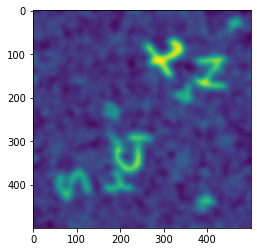

Blured , Kernel size :  47


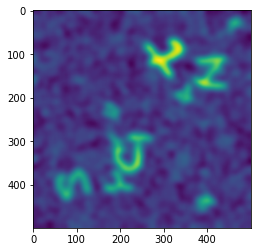

Blured , Kernel size :  49


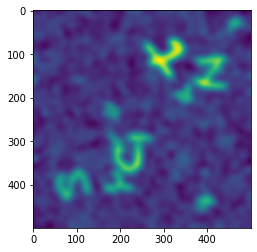

Blured , Kernel size :  51


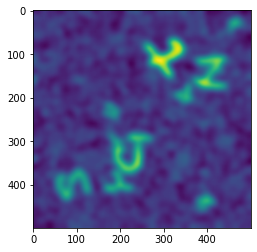

Blured , Kernel size :  53


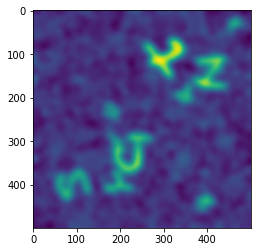

Blured , Kernel size :  55


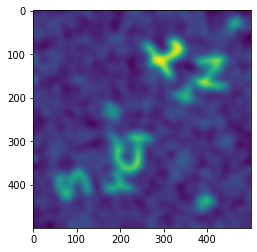

Blured , Kernel size :  57


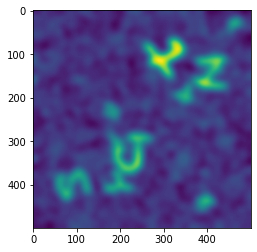

Blured , Kernel size :  59


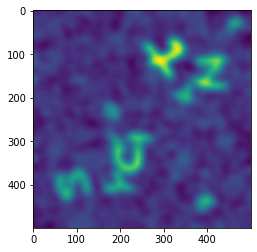

Blured , Kernel size :  61


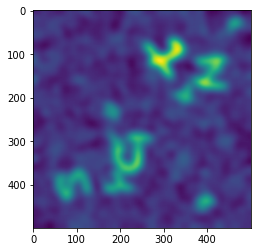

Blured , Kernel size :  63


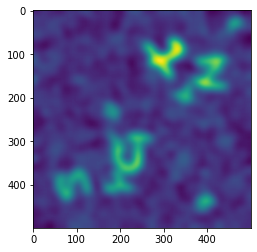

Blured , Kernel size :  65


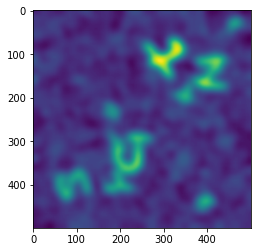

Blured , Kernel size :  67


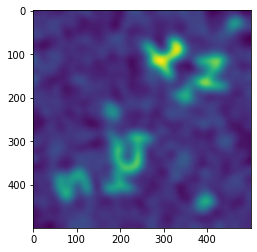

Blured , Kernel size :  69


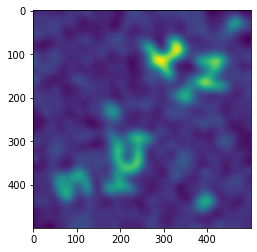

Blured , Kernel size :  71


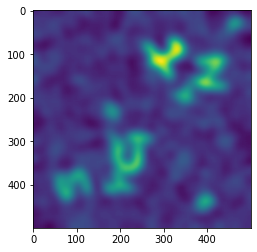

Blured , Kernel size :  73


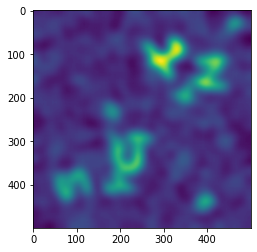

Blured , Kernel size :  75


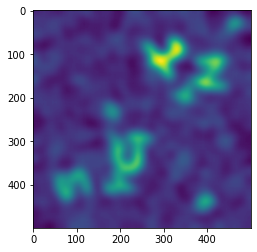

Blured , Kernel size :  77


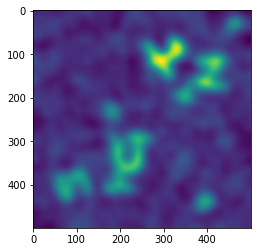

Blured , Kernel size :  79


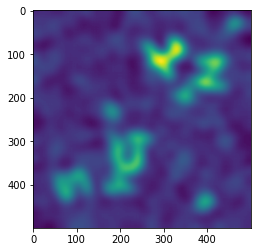

Blured , Kernel size :  81


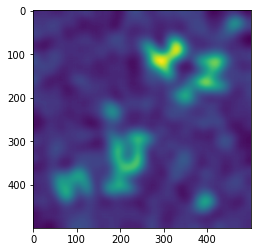

Blured , Kernel size :  83


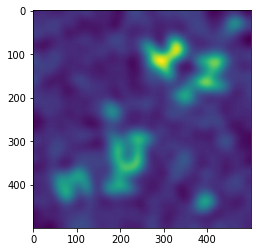

Blured , Kernel size :  85


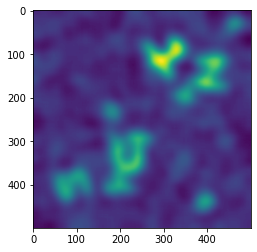

Blured , Kernel size :  87


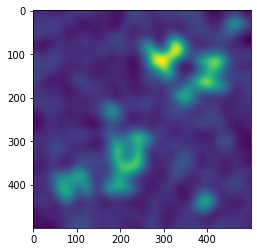

Blured , Kernel size :  89


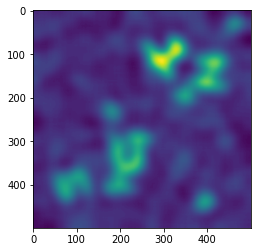

Blured , Kernel size :  91


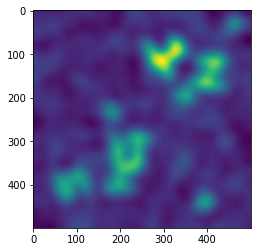

Blured , Kernel size :  93


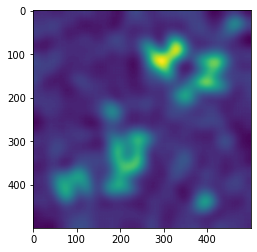

Blured , Kernel size :  95


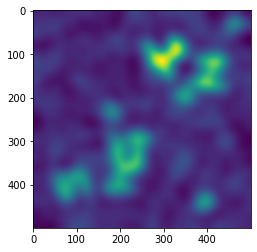

Blured , Kernel size :  97


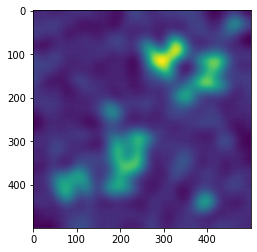

Blured , Kernel size :  99


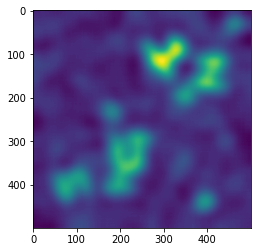

In [33]:
for k in range(50):
  kernalSize = 2*k + 1 
  blur = cv2.GaussianBlur(res, (kernalSize, kernalSize), 0)

  print("Blured , Kernel size : ",kernalSize)
  plt.imshow(blur)
  plt.show()
